In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
sber_data = pd.read_csv('data/sber_data.csv')
sber_data

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,1.103579,0.167718,0.349899,1.235066,0.612359,7.482165,4.836787,good,0,7400000
30467,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,0,25000000
30468,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,4.338453,1.339078,1.234235,1.192543,1.186621,13.459593,9.890758,no data,0,6970959
30469,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,0,13500000


In [8]:
# Задание 2.1

sber_data.shape

(30471, 61)

In [9]:
# Задание 2.2

sber_data['sub_area'].nunique()

146

In [10]:
# Задание 2.3

sber_data['price_doc'].max()

111111112

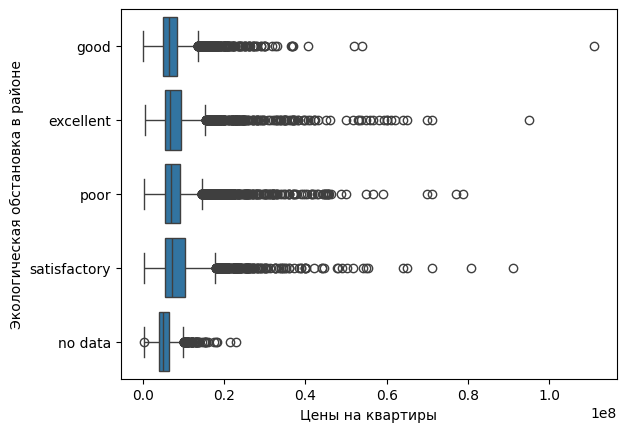

In [23]:
# Задание 2.4

fig, ax = plt.subplots()

sns.boxplot(
    x=sber_data['price_doc'],
    y=sber_data['ecology'],
    orient='h',
)
ax.set_xlabel('Цены на квартиры')
ax.set_ylabel('Экологическая обстановка в районе');

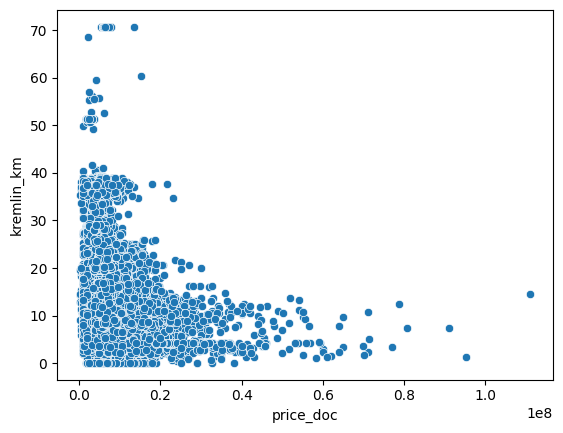

In [22]:
# Задание 2.5

fig, ax = plt.subplots()

sns.scatterplot(
    data=sber_data,
    x='price_doc', 
    y='kremlin_km'
);

# <center>Работа с пропусками</center>

В *pandas* пропуски обозначаются специальным символом *NaN* (*Not-a-Number* — «не число»). 

**<u>Причины появления пропусков в данных:</u>**
* Ошибка ввода данных;
* Ошибка передачи данных;
* Намеренное сокрытие информации;
* Прямое отсутствие информации;
* Мошенничество.

Ранее мы определяли наличие пропусков в данных с помощью метода `info()`. Но этот метод не позволяет точно локализовать места пропущенных значений, он выводит только число непустых значений и предназначен для определения факта наличия пропусков.

Найти пропуски зачастую довольно просто за исключением тех случаев, когда пропуски скрыты. Ячейки с пропуском могут быть помечены специальным символом, например, “`?`” или “`no data`”.

В библиотеке *pandas* специально для этого реализован метод `isnull()`. Этот метод возвращает новый *DataFrame*, в ячейках которого стоят булевы значения *True* и *False*. *True* ставится на месте, где ранее находилось значение *NaN*.

In [24]:
display(sber_data.isnull().tail())

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
30466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30468,False,False,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
30469,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30470,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## <center>Обнаружение пропусков</center>

<u>Первый способ:</u>
Это вывести на экран названия столбцов, где число пропусков больше 0 (**список столбцов с пропусками**).

Для этого: 
1) Вычислим средний по столбцам результат метода `isnull()`. Получим долю пропусков в каждом столбце. (*True* — 1, *False* — 0, при расчёте среднего получим долю 1 от общего числа строк); 
2) Умножаем на 100 %;
3) Находим столбцы, где доля пропусков больше 0;
4) Сортируем по убыванию;
5) Выводим результат:

In [25]:
cols_null_percent = sber_data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

<u>Второй способ:</u>

Можно воспользоваться столбчатой диаграммой, чтобы визуально оценить соотношение числа пропусков к числу записей. Самый быстрый способ построить её — использовать метод `plot()`:

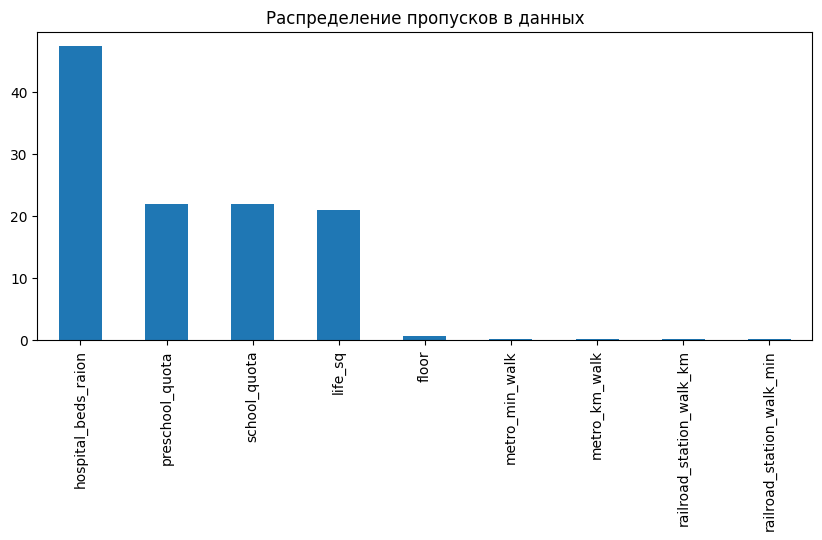

In [26]:
cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
);

<u>Третий способ:</u>

Тепловая карта. Её часто используют, когда столбцов с пропусками не так много (меньше 10). Она позволяет понять не только соотношение пропусков в данных, но и их характерное местоположение в таблице. 

Для создания такой тепловой карты можно воспользоваться результатом метода `isnull()`. Ячейки таблицы, в которых есть пропуск, будем отмечать жёлтым цветом, а остальные — синим. Для этого создадим собственную палитру цветов тепловой карты с помощью метода `color_palete()` из библиотеки *seaborn*.

На полученной тепловой карте мы не видим чётких процентных соотношений для числа пропусков в данных, однако мы можем увидеть места их концентрации в таблице. 

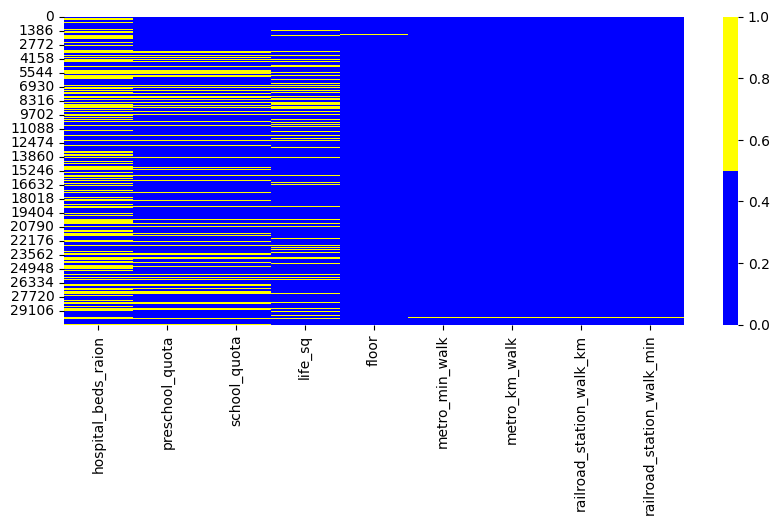

In [27]:
colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    sber_data[cols].isnull(),
    cmap=sns.color_palette(colors),
)